In [1]:
import sys

import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.keras import layers

sys.path.append('../src')
import columnar as col

%load_ext autoreload
%autoreload 2

# Categorical Embeddings
Alternative to General

In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
df = col.loaders.petfinder._load('../')
feature_selection = col.FeatureSelection(**col.loaders.petfinder._select_features(df))

In [4]:
df.target.mean()

0.7200693657039952

In [5]:
{col: df[col].nunique() for col in df.columns}

{'type': 2,
 'age': 106,
 'breed1': 176,
 'breed2': 135,
 'gender': 3,
 'color1': 7,
 'color2': 7,
 'color3': 6,
 'maturitysize': 4,
 'furlength': 3,
 'vaccinated': 3,
 'dewormed': 3,
 'sterilized': 3,
 'health': 3,
 'quantity': 19,
 'fee': 74,
 'state': 14,
 'rescuerid': 5595,
 'videoamt': 9,
 'photoamt': 31,
 'has_name': 2,
 'target': 2}

In [6]:
ds = col.embeddings.df_to_dataset(df, 'target', batch_size=32)

Metal device set to: Apple M1 Pro


2022-01-26 14:20:05.703952: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-01-26 14:20:05.704087: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [55]:
ds = df_to_dataset(df, 'target', batch_size=5)
[(train_features, label_batch)] = ds.take(1)

In [57]:
col.TFEmbeddingLayer

columnar.embeddings.tf_preprocessing.TFEmbeddingLayer

In [56]:
train_features.keys()

dict_keys(['type', 'age', 'breed1', 'breed2', 'gender', 'color1', 'color2', 'color3', 'maturitysize', 'furlength', 'vaccinated', 'dewormed', 'sterilized', 'health', 'quantity', 'fee', 'state', 'rescuerid', 'videoamt', 'photoamt', 'has_name'])

In [6]:
from sklearn.ensemble import RandomForestClassifier

feats = col.FeatureSelection(target='target',categoricals=['type'], numericals=['photoamt', 'videoamt', 'fee', 'age'])
transformer = col.MeanTargetEncoder(feats)
model = RandomForestClassifier(n_estimators=100, max_depth=5)
pipe = col.CategoricalPipeline(features=feats,
                               transform=transformer,
                               scaler=None,
                               model=model,
                              )

In [7]:
pipe.fit(df)

In [62]:
# pipe.pipe.get_params()

In [8]:
pipe.pipe.steps[0][1].transform(df.head())

,type_,photoamt,videoamt,fee,age
PetID,,,,,
86e1089a3,0.740111,1.0,0,100,3
6296e909a,0.740111,2.0,0,0,1
3422e4906,0.703158,7.0,0,0,1
5842f1ff5,0.703158,8.0,0,150,4
850a43f90,0.703158,3.0,0,0,1


In [37]:
from sklearn.metrics import accuracy_score, f1_score

pipe = col.CategoricalPipeline(features=feature_selection,
                              transform=col.MeanTargetEncoder(feats),
                              model=RandomForestClassifier(max_depth=5, n_estimators=100))

pipe.fit(df)
print(pipe.predict(df.head()))
f1_score(df.target, (pipe.predict(df) > .5))

[0.72730883 0.83452213 0.86059307 0.66455585 0.81519586]


0.8396311555817147

In [7]:
# from sklearn.compose import ColumnTransformer
# from sklearn.base import TransformerMixin

# class TotalTransformer(TransformerMixin):
#     def __init__(self, features, cat_encoder):
#         self.features = features
#         self.cat_encoder = cat_encoder
#         self.transformer = ColumnTransformer(
#             [('categories', cat_encoder, features.categoricals)], 
#             remainder='passthrough')
    
#     def fit(self, X, y=None):
#         return self.transformer.fit(X,y)
        
#     def transform(self, X):
#         return self.transformer.transform(X)
    
#     def get_params(self, deep: bool = True):
#         cat_encoder = clone(self.cat_encoder) if deep else self.cat_encoder
#         return {'features': self.features, 'cat_encoder': cat_encoder}
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.base import clone
from sklearn.metrics import f1_score

tt = col.TransformStrategy(feature_selection, OneHotEncoder())
tt.fit_transform(df).shape

(14993, 5990)

In [12]:
pipe = col.CategoricalPipeline(features=feature_selection,
                              transform=col.TransformStrategy(feature_selection, OneHotEncoder()),
                              model=RandomForestClassifier(max_depth=5, n_estimators=100))

pipe.fit(df)
print(pipe.predict(df.head()))
f1_score(df.target, (pipe.predict(df) > .5))

[0.74712157 0.70827339 0.74445654 0.70714241 0.75170743]


0.8372561945015317

<AxesSubplot:>

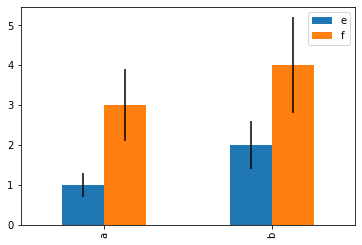

In [24]:
vals = pd.DataFrame(data={'e': {'a': 1 , 'b': 2}, 'f': {'a': 3 , 'b': 4}})
errs = vals * .3

vals.plot.bar(yerr=errs)

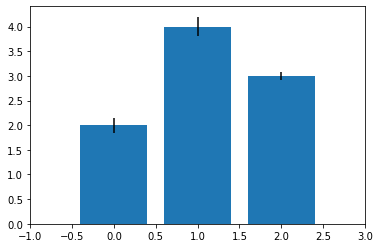

In [19]:
import matplotlib.pyplot as plt
data = np.array([[0,2,.3], [1,4,.4], [2,3,.15]])
plt.figure()
yerr_ = np.tile(data[:,2]/2, (2,1))
plt.bar(data[:,0], data[:,1], yerr=yerr_)
plt.xlim([-1,3])
plt.show()

In [43]:
# test behavior of 
col.FeatureSelection()

{'categories': 'auto',
 'drop': None,
 'dtype': numpy.float64,
 'handle_unknown': 'error',
 'sparse': True}

In [44]:
[(train_features, label_batch)] = ds.take(1)

feature_selection = col.FeatureSelection(categoricals=['type', 'age', 'breed1', 'breed2', 'gender', 'color1', 'color2', 'color3', 'maturitysize', 'furlength', 'vaccinated', 'dewormed', 'sterilized', 'health', 'quantity', 'state', 'rescuerid', 'has_name'], 
                                         numericals=['photoamt', 'videoamt', 'fee'], 
                                         target='target')

In [9]:
df2, labels = df.drop(columns=['target']), df.target

In [40]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
ohe.fit(df)

OneHotEncoder()

In [41]:
(df.nunique()-1).sum()

6185

In [42]:
{col: (len([f for f in ohe.get_feature_names_out() if col in f]), df[col].nunique()) for col in df.columns}

{'type': (2, 2),
 'age': (106, 106),
 'breed1': (176, 176),
 'breed2': (135, 135),
 'gender': (3, 3),
 'color1': (7, 7),
 'color2': (7, 7),
 'color3': (6, 6),
 'maturitysize': (4, 4),
 'furlength': (3, 3),
 'vaccinated': (3, 3),
 'dewormed': (3, 3),
 'sterilized': (3, 3),
 'health': (3, 3),
 'quantity': (19, 19),
 'fee': (117, 74),
 'state': (14, 14),
 'rescuerid': (5595, 5595),
 'videoamt': (9, 9),
 'photoamt': (31, 31),
 'has_name': (2, 2),
 'target': (2, 2)}

In [45]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, test_size=.2)

ds_train = df_to_dataset(df_train, 'target', batch_size=32)
ds_test = df_to_dataset(df_test, 'target', batch_size=32)

model = col.TFCatEmbsModel(ds_train, feature_selection)
# model(train_features)
model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=["accuracy"])

model.fit(ds_train, epochs=3)
model.evaluate(ds_test)

2022-01-26 11:45:54.278623: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-26 11:45:54.701577: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-26 11:45:54.715150: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-26 11:45:55.589870: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-26 11:45:55.600900: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-26 11:45:56.529510: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2022-01-26 11:45:56.539644: I tensorflow/core/grappler/optimizers/cust

Epoch 1/3


2022-01-26 11:45:57.663721: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


375/375 [==============================] - 5s 12ms/step - loss: 0.6064 - accuracy: 0.5979
Epoch 2/3
375/375 [==============================] - 4s 12ms/step - loss: 0.5831 - accuracy: 0.6668
Epoch 3/3
10/94 [==>...........................] - ETA: 0s - loss: 0.6137 - accuracy: 0.6687 

2022-01-26 11:46:11.209123: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


94/94 [==============================] - 1s 5ms/step - loss: 0.5722 - accuracy: 0.6986


[0.5721990466117859, 0.698566198348999]

In [43]:
model.encode_features(train_features).shape

TensorShape([32, 247])